# Rat OGD Circularity Range

Teng-Jui Lin

Created: 2022-05-22

Edited: 2022-08-18

Objective: We demonstrate that although C > 1 obtained by `skimage.measure.regionprops` exists, they are only a small to negligible fraction of our data. These C > 1 values are caused by small object sizes.

## Background

Circularity is defined as 

$$C = 4 \pi \dfrac{A}{P^2},$$

where A is the object's area, and P is the object's perimeter. Assuming continuous area and perimeter, circularity has a range of (0, 1], with a circle having a circularity of 1:

$$
C_{\mathrm{circ}} = 4 \pi \dfrac{A}{P^2} = 4 \pi \dfrac{\pi r^2}{(\pi \frac{r}{2})^2} =  \dfrac{4 \pi^2 r^2}{ \frac{\pi^2 r^2}{4}} = 1
$$

In image processing, [area and perimeter](http://www.inf.u-szeged.hu/ssip/2008/presentations2/SSIP2008LectureSladoje.pdf) are calculated discretely, therefore having deviation from the theoretical range based on continuous area and perimeter. [For object with small radius (r < 12), the calculated discrete perimeter is less than if it's continuous.](https://github.com/scikit-image/scikit-image/issues/3573) 

### Setup data

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import pandas as pd
import vampire as vp

/opt/miniconda3/envs/vampire-analysis/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
vp.plot.set_plot_style()

In [3]:
output_path = r'/Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-ogd/4-vampire-analysis-data'
property_path = os.path.join(output_path, 'labeled-apply-properties_otsu_on_otsu_(50_5_29)__.pickle')
apply_properties_df = vp.util.read_pickle(property_path)
otsu_properties_df = apply_properties_df[apply_properties_df['threshold'] == 'Otsu']

In [4]:
otsu_properties_df.head()

filename  image_id  label  centroid-y  \
27  4-50-13_40x_hippocampus_2_otsu_thresh.tif         3      1    6.000000   
28  4-50-13_40x_hippocampus_2_otsu_thresh.tif         3      2    8.687500   
29  4-50-13_40x_hippocampus_2_otsu_thresh.tif         3      3    3.596273   
30  4-50-13_40x_hippocampus_2_otsu_thresh.tif         3      4   11.939013   
31  4-50-13_40x_hippocampus_2_otsu_thresh.tif         3      5   25.826087   

    centroid-x  area  bbox_area  convex_area  filled_area   perimeter  ...  \
27  175.026667   225        338          278          225   74.284271  ...   
28  315.508929   448        580          477          448   86.319805  ...   
29  397.683230   161        264          186          161   58.384776  ...   
30  463.757018  1033       1624         1163         1033  155.260931  ...   
31    3.130435   115        200          130          115   45.556349  ...   

                                          raw_contour  circularity  \
27  [[17, 18, 19, 20, 21, 22, 23, 22, 21, 22, 23, ...     0.512388   
28  [[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, ...     0.755557   
29  [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...     0.593522   
30  [[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, ...     0.538500   
31  [[0, 0, 1, 2, 3, 4, 5, 5, 5, 6, 6, 7, 8, 9, 8,...     0.696322   

    aspect_ratio                                 normalized_contour  \
27      2.286986  [1.1886196645178766, 1.0529222899859982, 0.959...   
28      1.674522  [1.1746678380325335, 1.1251685872420982, 1.076...   
29      1.923685  [1.1845475380188062, 1.2880526747408907, 1.383...   
30      1.901169  [1.360513791653374, 1.4256326464755278, 1.3203...   
31      2.018495  [1.2892236868111766, 1.3731912183021284, 1.349...   

    cluster_id  distance_to_centroid  slice_id       treatment       region  \
27           3              0.847165   4-50-13  OGD 3.0h + SOD  Hippocampus   
28           2              0.760229   4-50-13  OGD 3.0h + SOD  Hippocampus   
29           0              0.948676   4-50-13  OGD 3.0h + SOD  Hippocampus   
30           3              0.978826   4-50-13  OGD 3.0h + SOD  Hippocampus   
31           3              0.929287   4-50-13  OGD 3.0h + SOD  Hippocampus   

    threshold  
27       Otsu  
28       Otsu  
29       Otsu  
30       Otsu  
31       Otsu  

[5 rows x 28 columns]

In [5]:
# get entries with over range circularity
circularity_cond = otsu_properties_df['circularity'] > 1
over_range_df = otsu_properties_df[circularity_cond]
over_range_df.head()

filename  image_id  label  centroid-y  \
554       4-50-6_40x_thalamus_2_otsu_thresh.tif        20     20  270.160000   
1483        4-50-6_40x_cortex_4_otsu_thresh.tif        44      9  197.455285   
3202  4-50-10_40x_hippocampus_3_otsu_thresh.tif        86     51  237.731884   
4317   4-50-6_40x_hippocampus_4_otsu_thresh.tif       110     13   60.000000   
4318   4-50-6_40x_hippocampus_4_otsu_thresh.tif       110     14   73.470238   

      centroid-x  area  bbox_area  convex_area  filled_area  perimeter  ...  \
554    83.173333    75        110           80           75  30.384776  ...   
1483  451.000000   123        169          129          123  39.213203  ...   
3202    8.260870   138        180          141          138  41.213203  ...   
4317   81.500000   102        132          108          102  34.970563  ...   
4318   88.791667   168        210          173          168  45.798990  ...   

                                            raw_contour  circularity  \
554   [[5, 6, 7, 8, 9, 10, 10, 10, 10, 9, 8, 7, 6, 5...     1.020843   
1483  [[7, 8, 9, 10, 10, 11, 12, 12, 12, 11, 10, 10,...     1.005195   
3202  [[7, 8, 9, 10, 11, 12, 13, 13, 14, 14, 14, 14,...     1.020978   
4317  [[5, 6, 7, 8, 9, 10, 10, 11, 11, 11, 10, 10, 9...     1.048105   
4318  [[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14, 14, 1...     1.006485   

      aspect_ratio                                 normalized_contour  \
554       1.155411  [1.127971948326248, 1.0218368325024074, 0.9485...   
1483      1.121411  [1.080002293848527, 1.0105632474330826, 0.9370...   
3202      1.284681  [1.1093517813916816, 1.0982700483541021, 1.042...   
4317      1.056281  [1.0576551471940767, 1.0409584963399683, 1.005...   
4318      1.075918  [1.1078459236751557, 1.0477530307163412, 1.003...   

      cluster_id  distance_to_centroid  slice_id       treatment       region  \
554            2              0.410720    4-50-6        OGD 3.0h     Thalamus   
1483           2              0.435233    4-50-6        OGD 3.0h       Cortex   
3202           2              0.400078   4-50-10  Normal Control  Hippocampus   
4317           2              0.366379    4-50-6        OGD 3.0h  Hippocampus   
4318           2              0.366525    4-50-6        OGD 3.0h  Hippocampus   

      threshold  
554        Otsu  
1483       Otsu  
3202       Otsu  
4317       Otsu  
4318       Otsu  

[5 rows x 28 columns]

### Value of circularity deviation is minor

The deviation from theoretical maximum is minor as shown by the mean and median:

In [6]:
over_range_df['circularity'].mean()

1.0269457841419718

In [7]:
over_range_df['circularity'].median()

1.0209775785120345

### Fraction of objects with circularity deviation is neglegible 

The number of over-range entries is small to neglegible:

In [8]:
# number of over range entries
over_range_df['circularity'].size

35

In [9]:
# ratio of over range entries
over_range_df['circularity'].size / otsu_properties_df['circularity'].size

0.0017027487229384578

### Objects with circularity deviation has small radius

The characteristic length (major axis length) of the over-range entries are small, consistent with reported deviation at small radius. Note that not all small objects will have such problem. Only ones that are circular may have C > 1. Therefore, the over-range entries can be regarded as having C = 1.

In [10]:
over_range_df['major_axis_length'].median()

11.83310201125619

In [11]:
over_range_df['major_axis_length'].max()

17.45571216959118

In [12]:
otsu_properties_df['major_axis_length'].median()

22.744860390762458

### Objects with circularity deviation of C > 1 can be approximated by circles

Many of the over-range objects are highly circular.

/var/folders/xw/swxm3b951rq22wf0cr61c7vm0000gn/T/ipykernel_25919/983760981.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize=(10, 4))


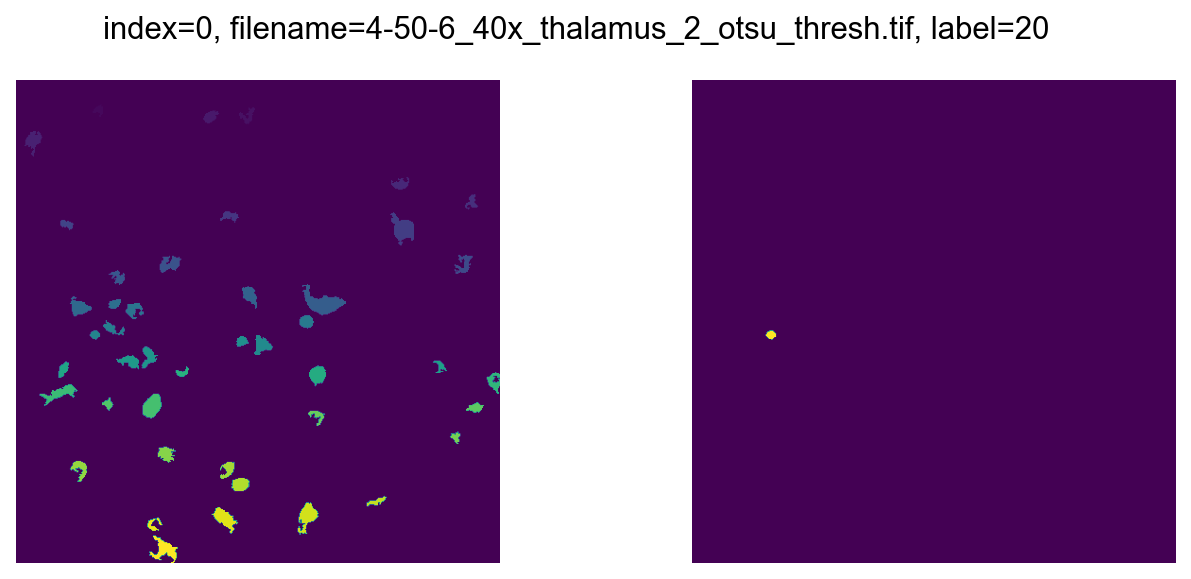

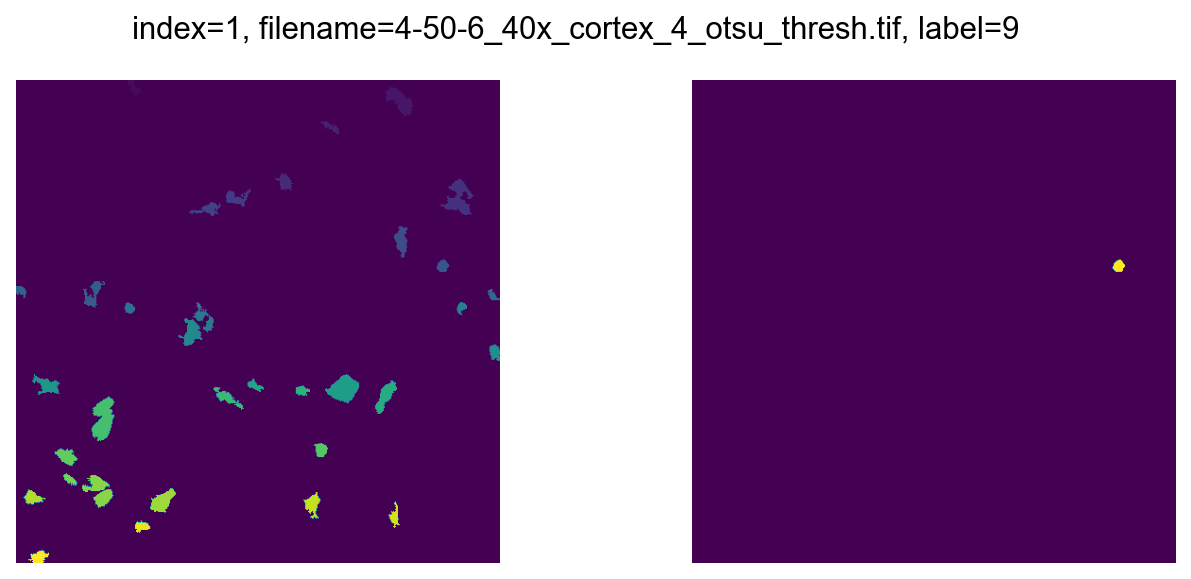

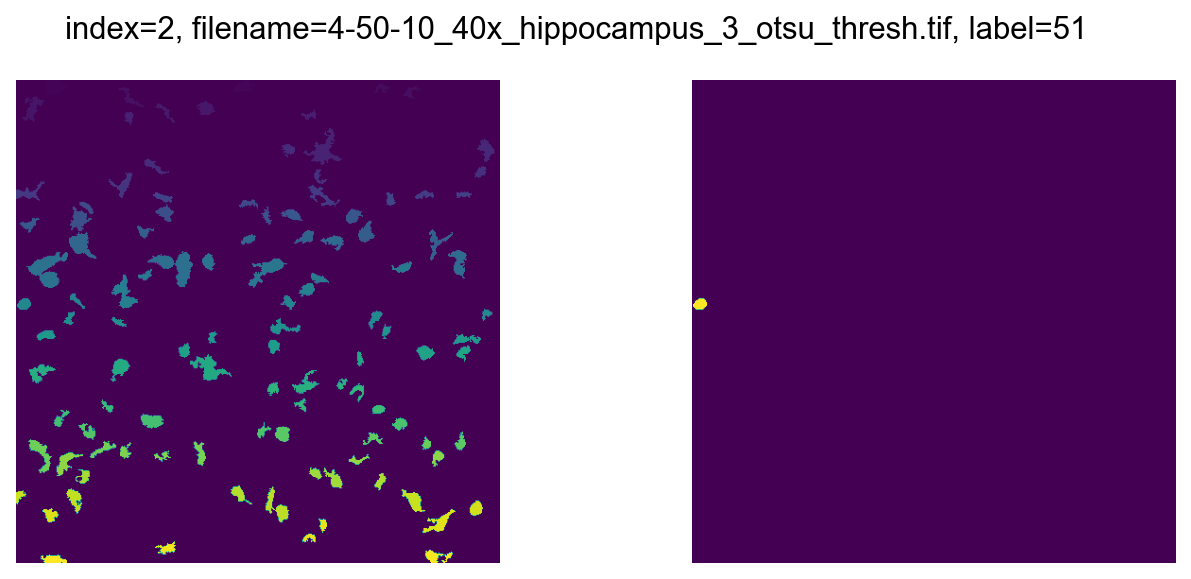

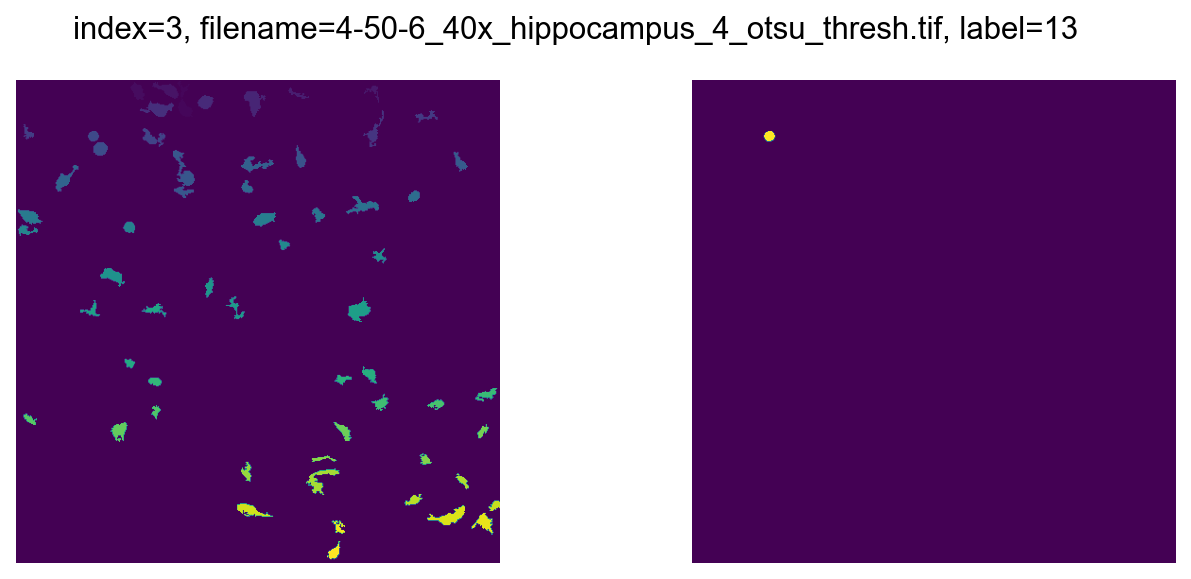

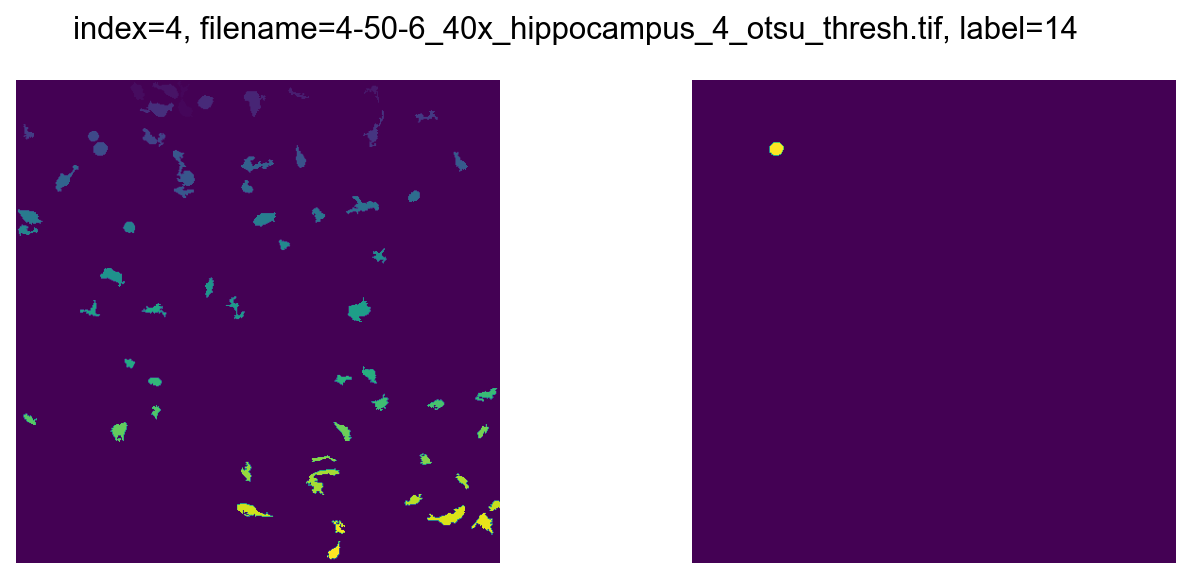

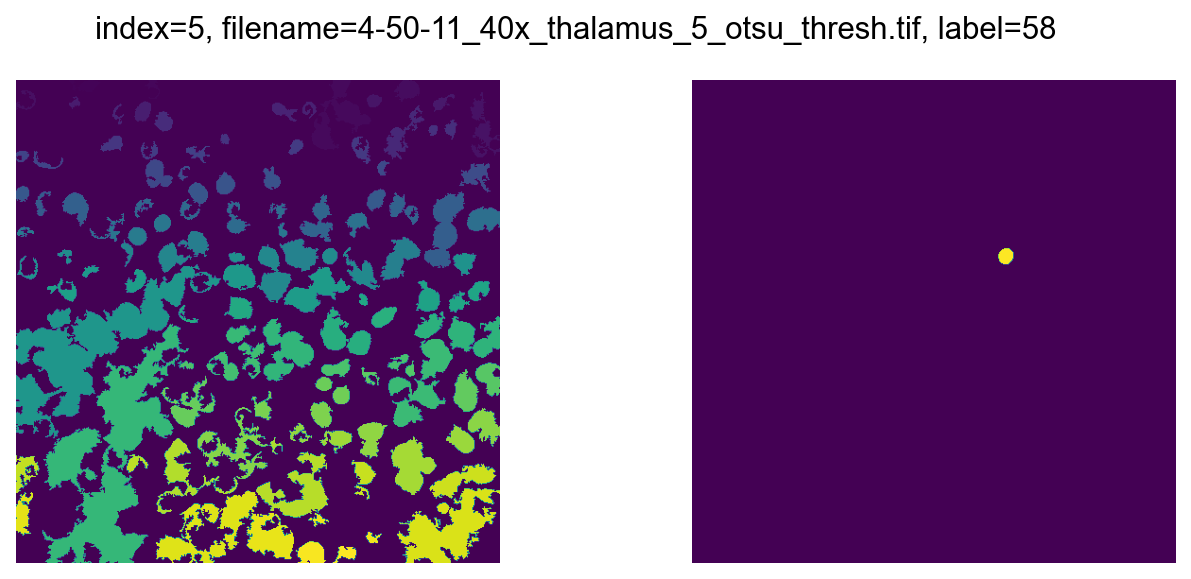

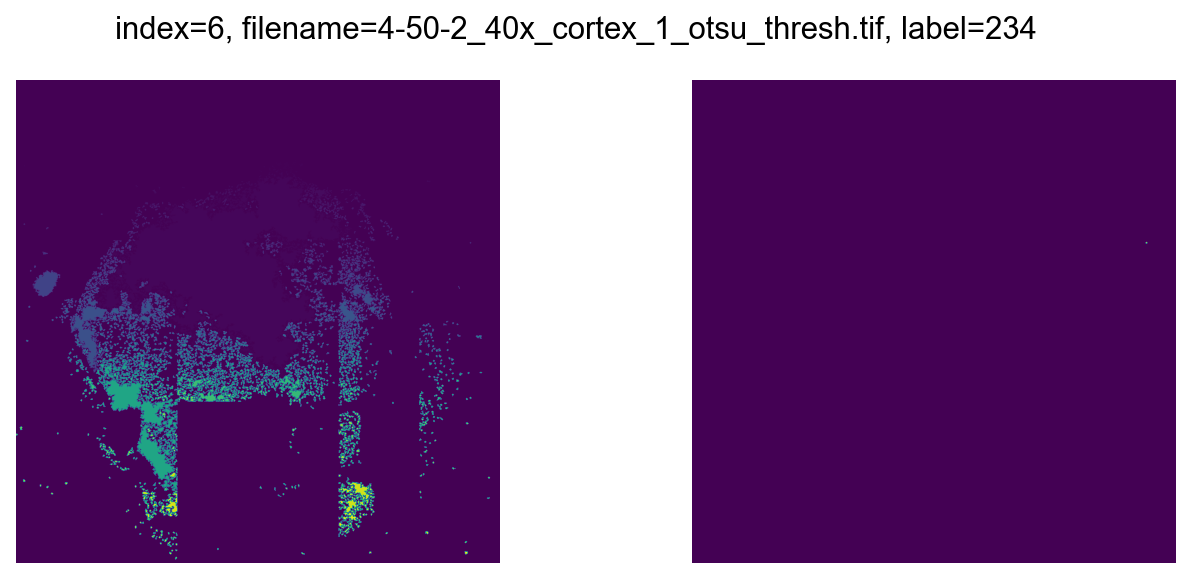

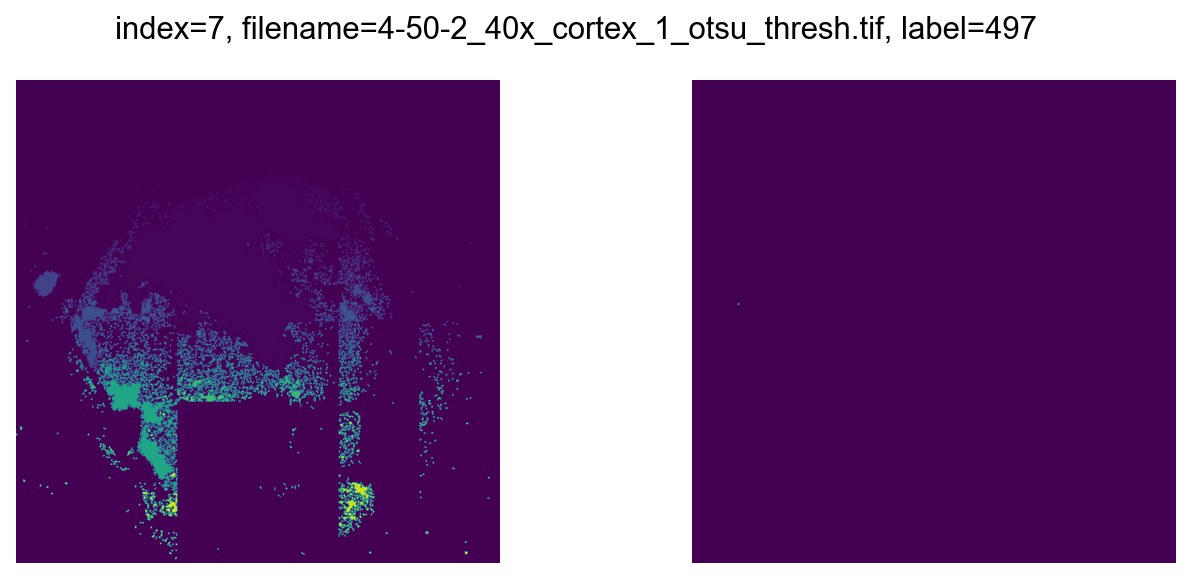

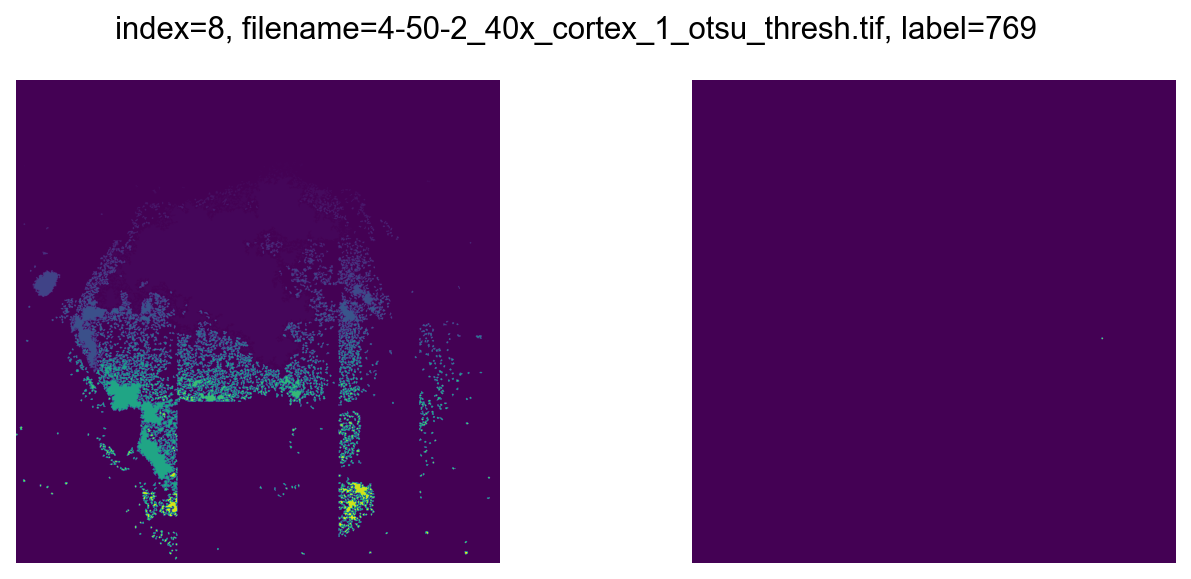

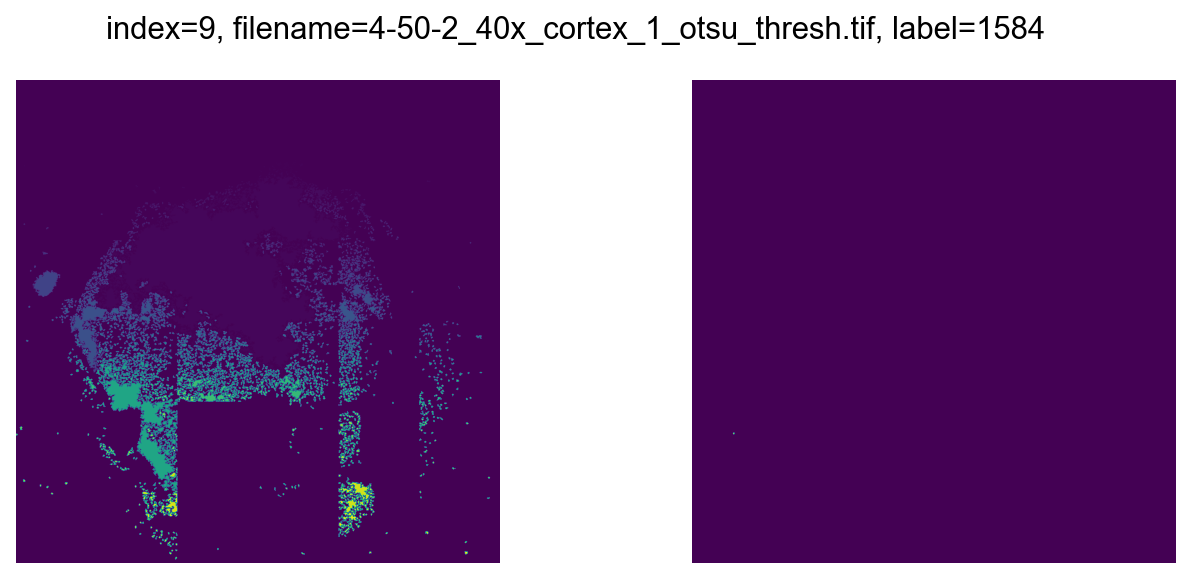

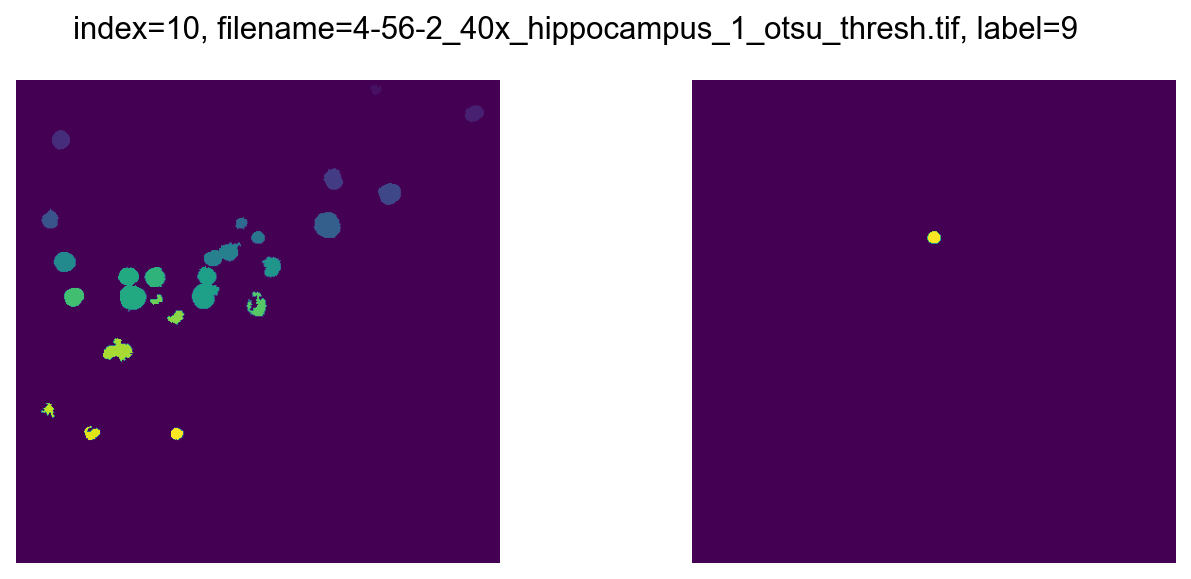

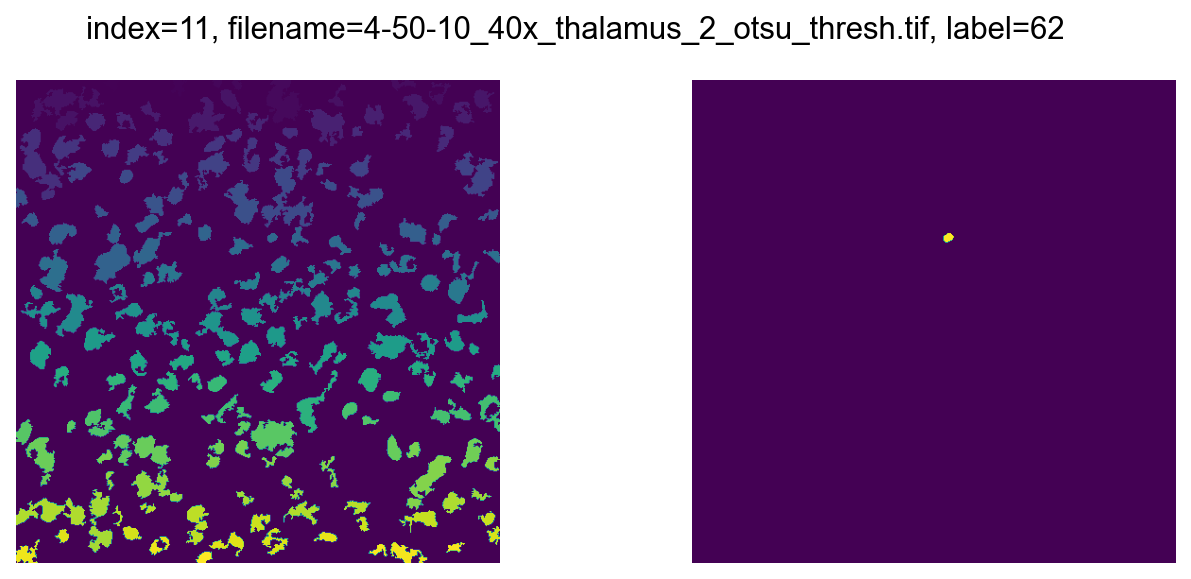

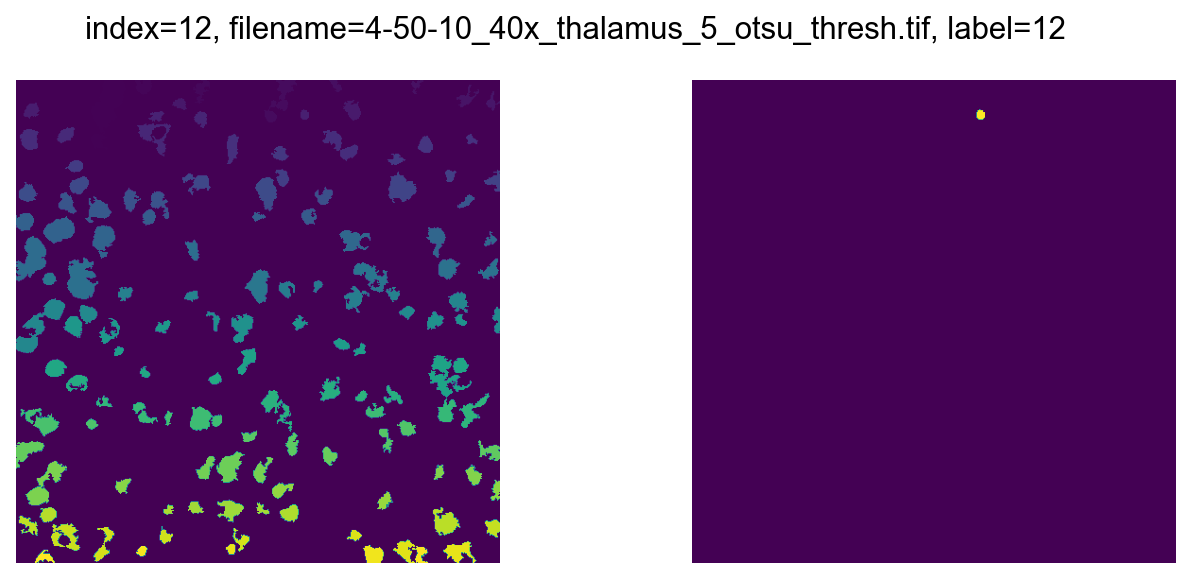

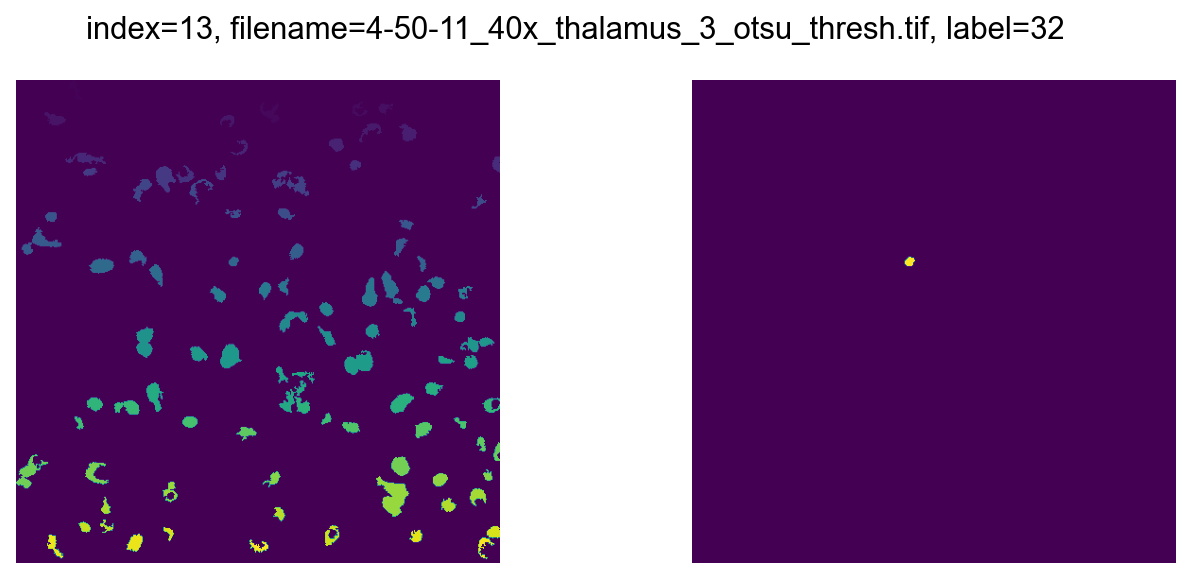

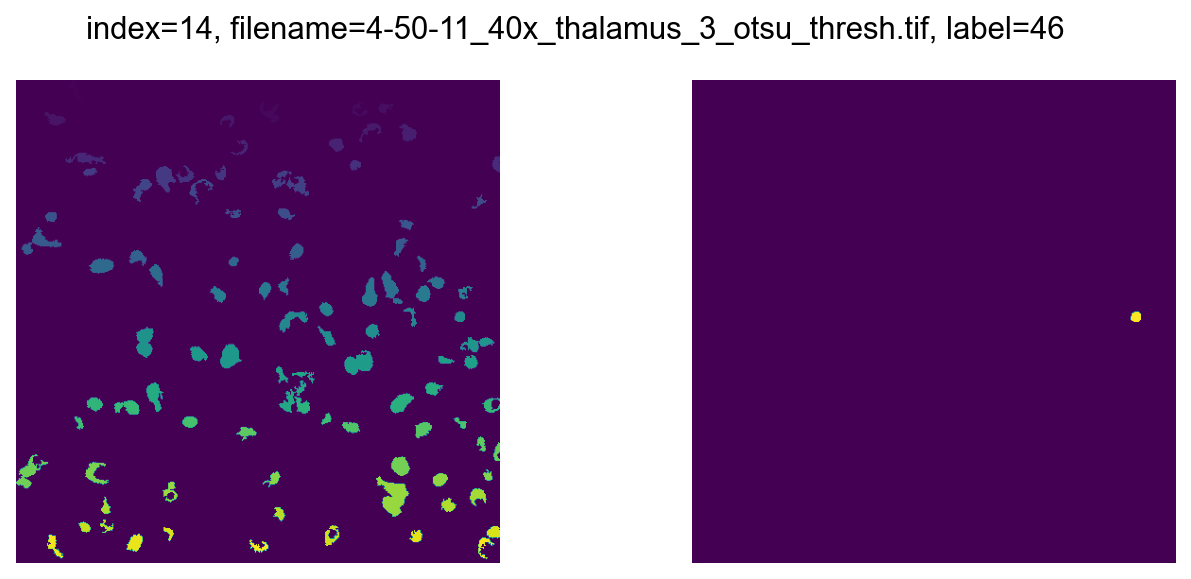

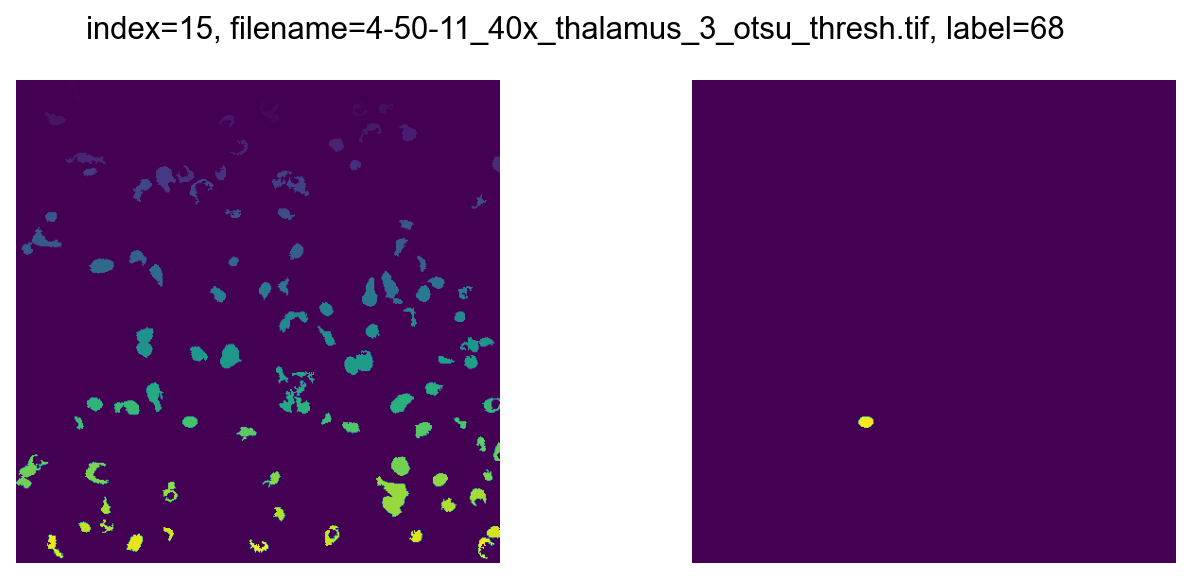

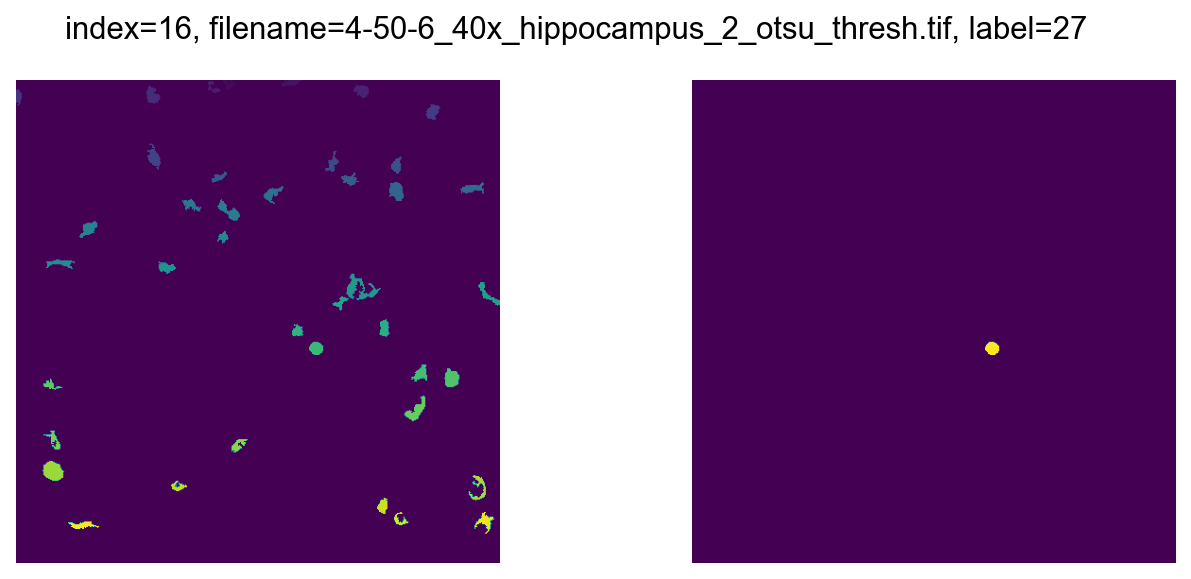

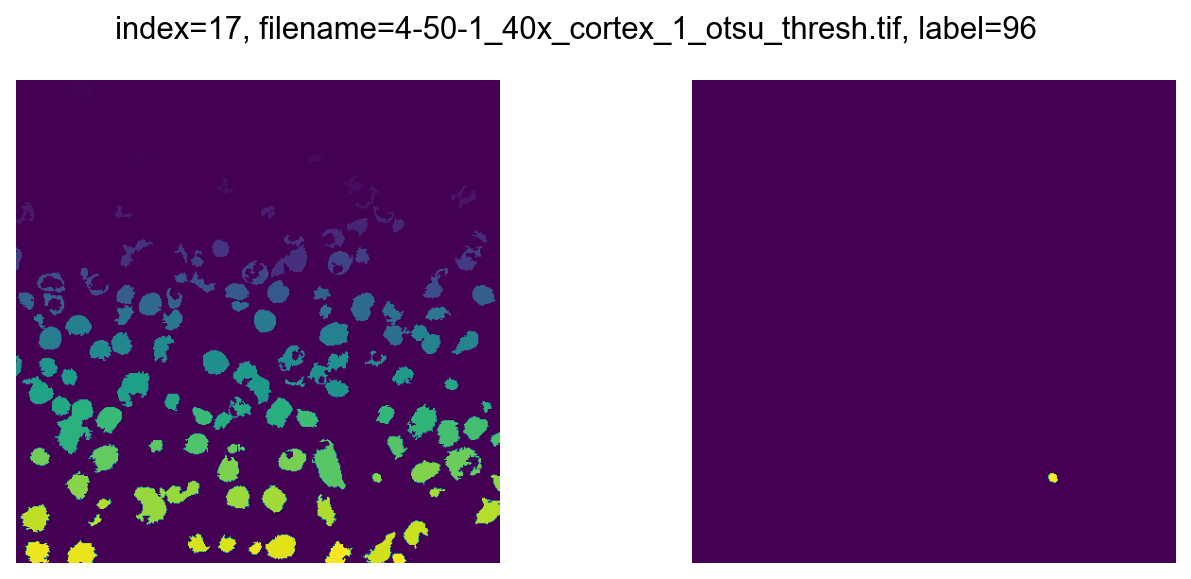

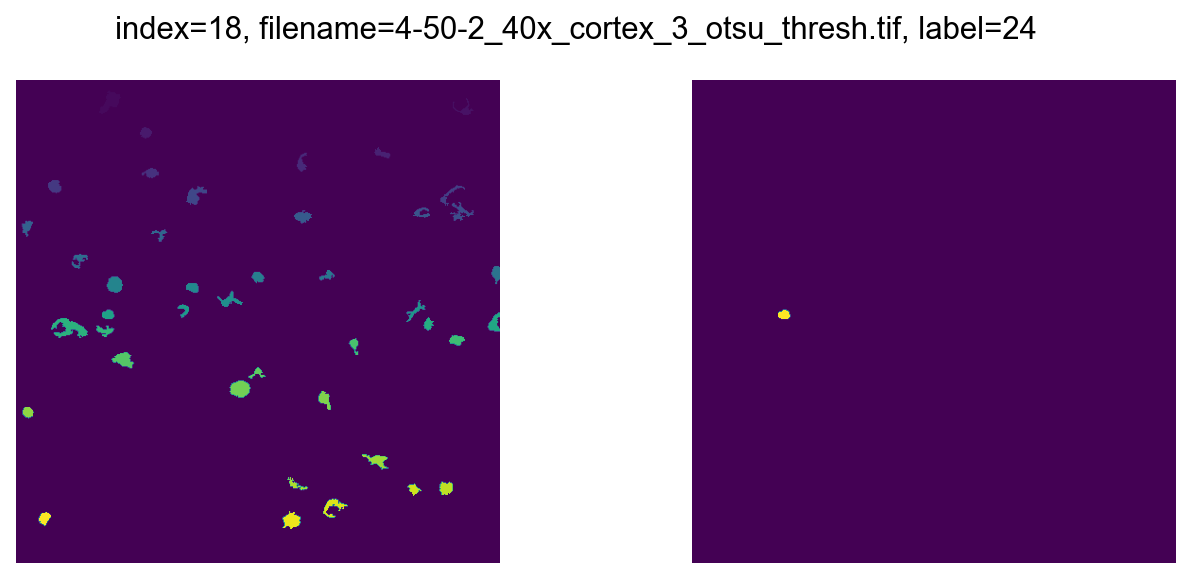

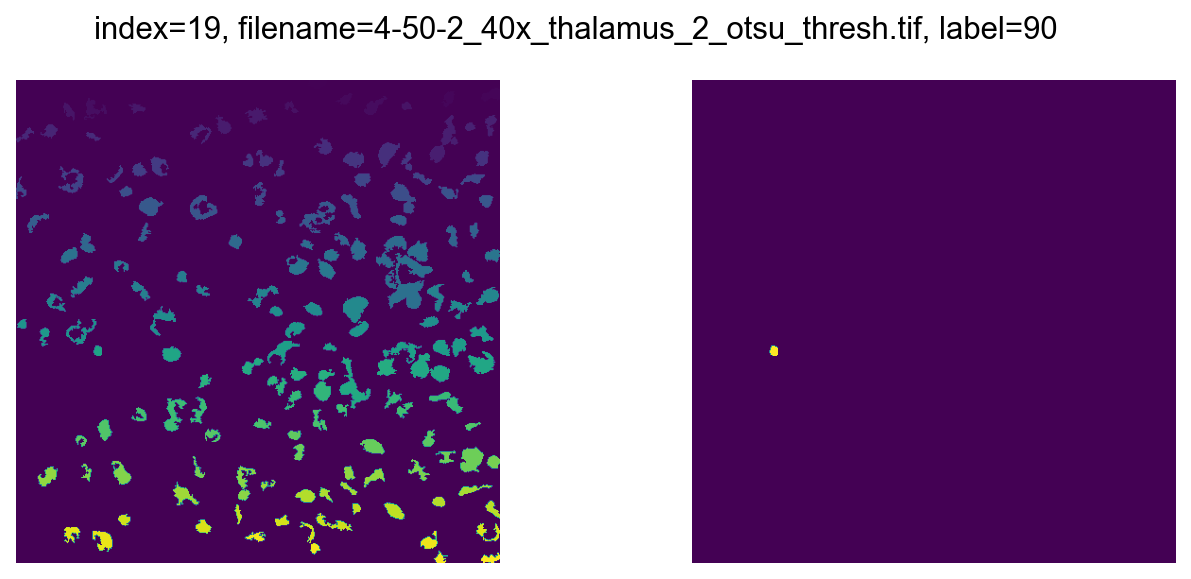

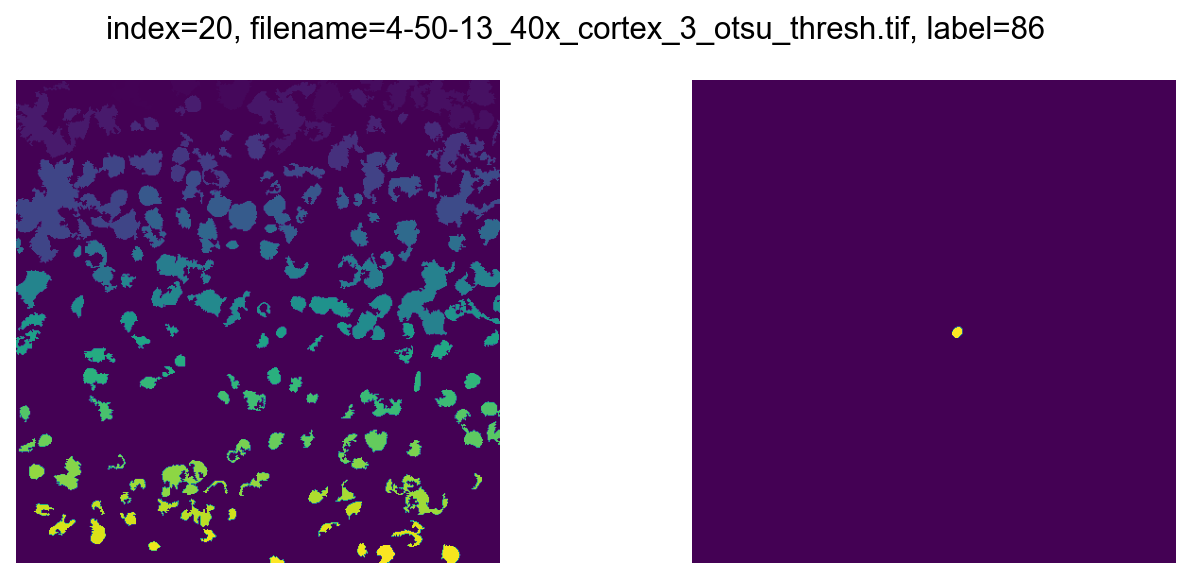

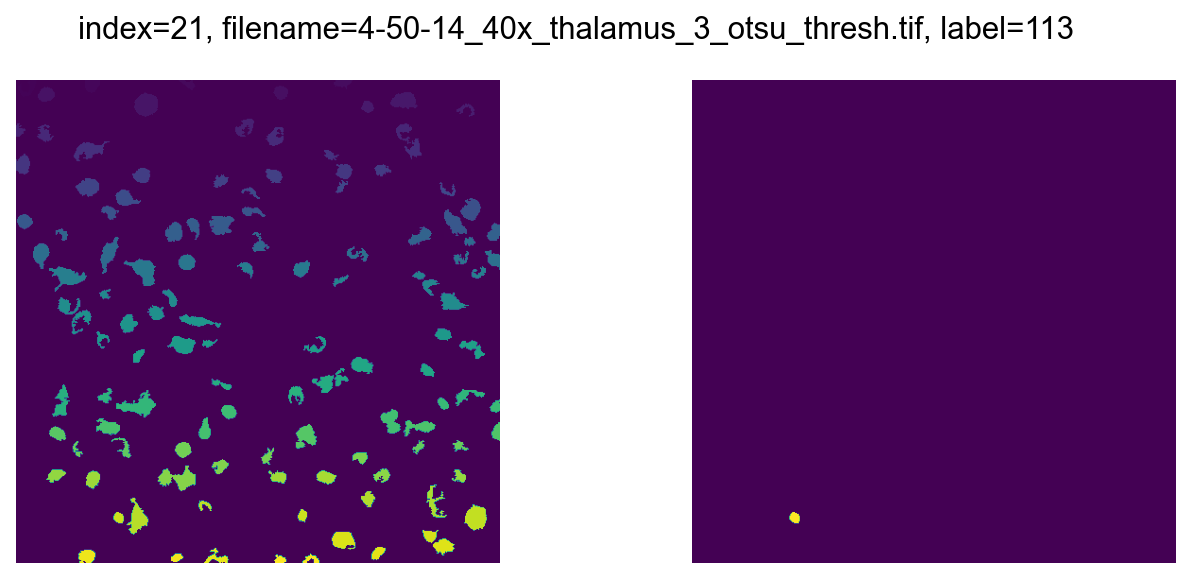

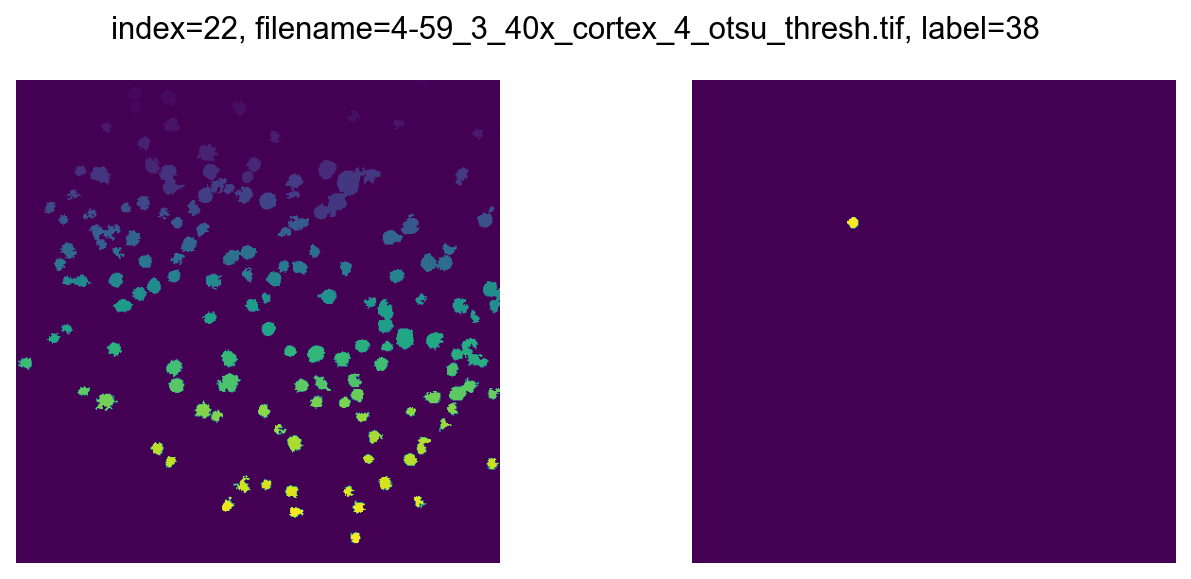

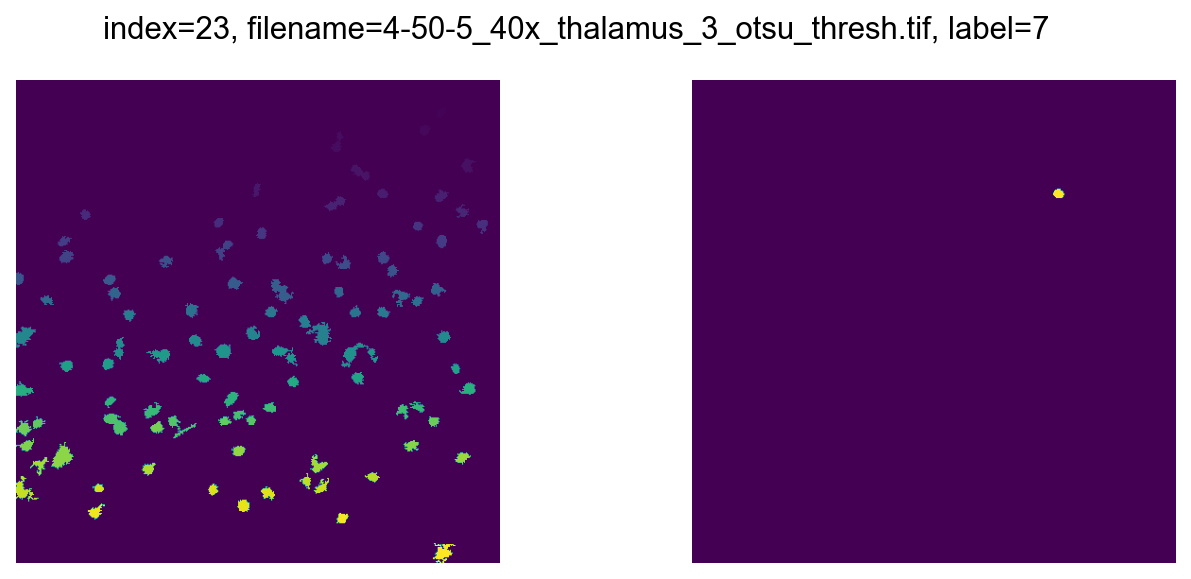

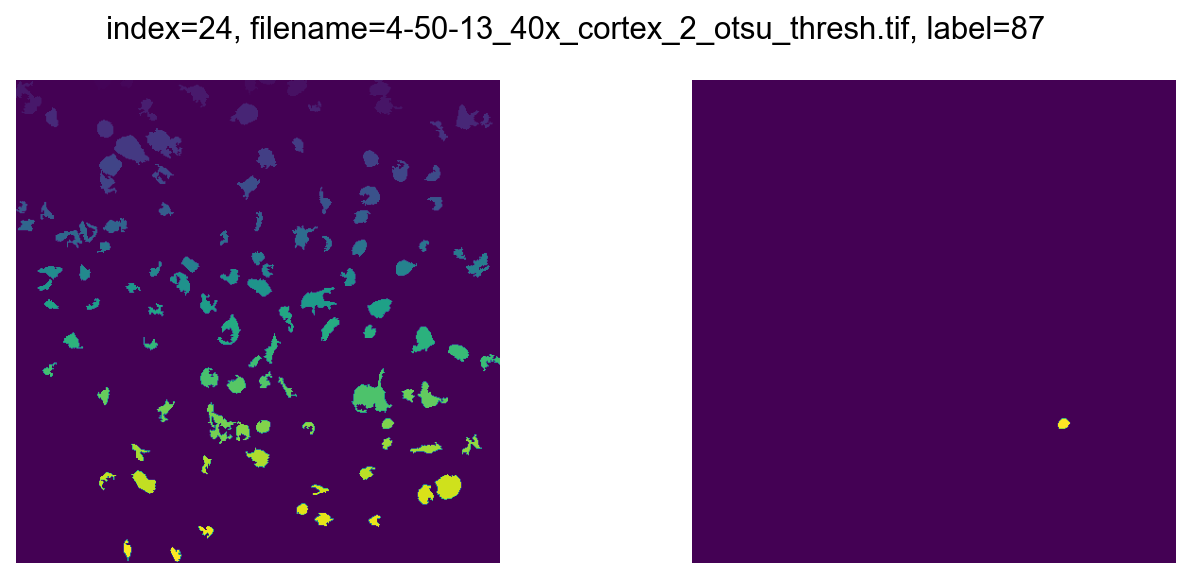

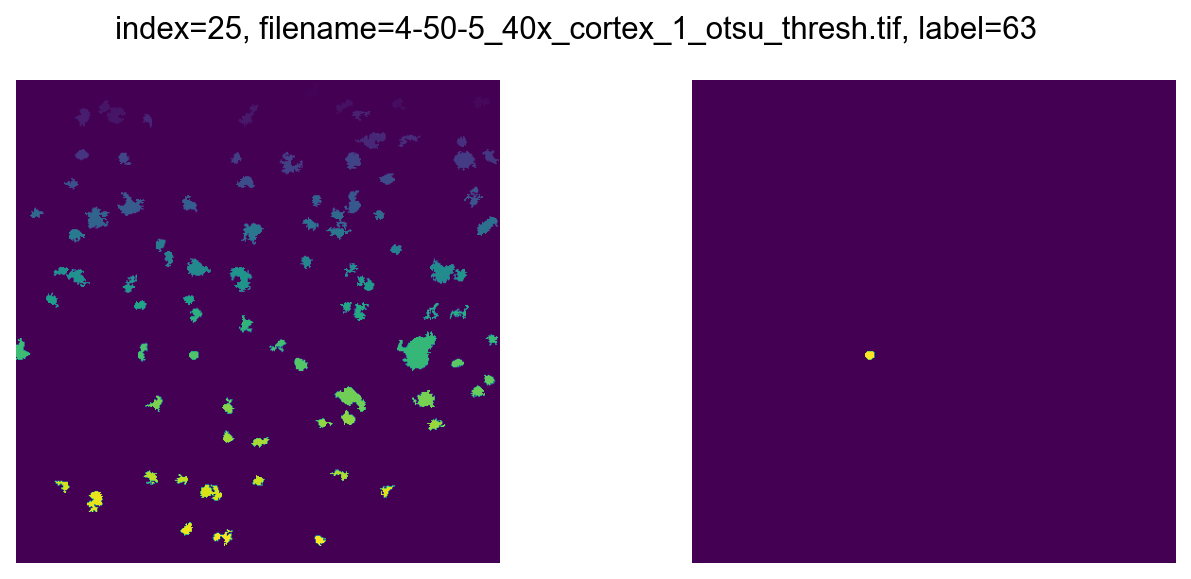

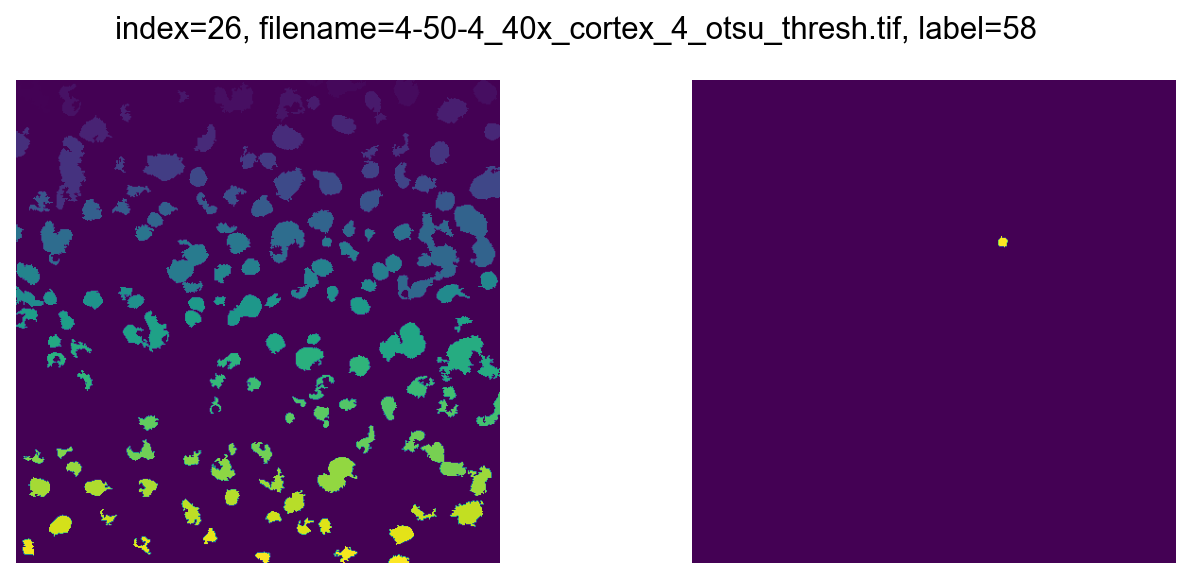

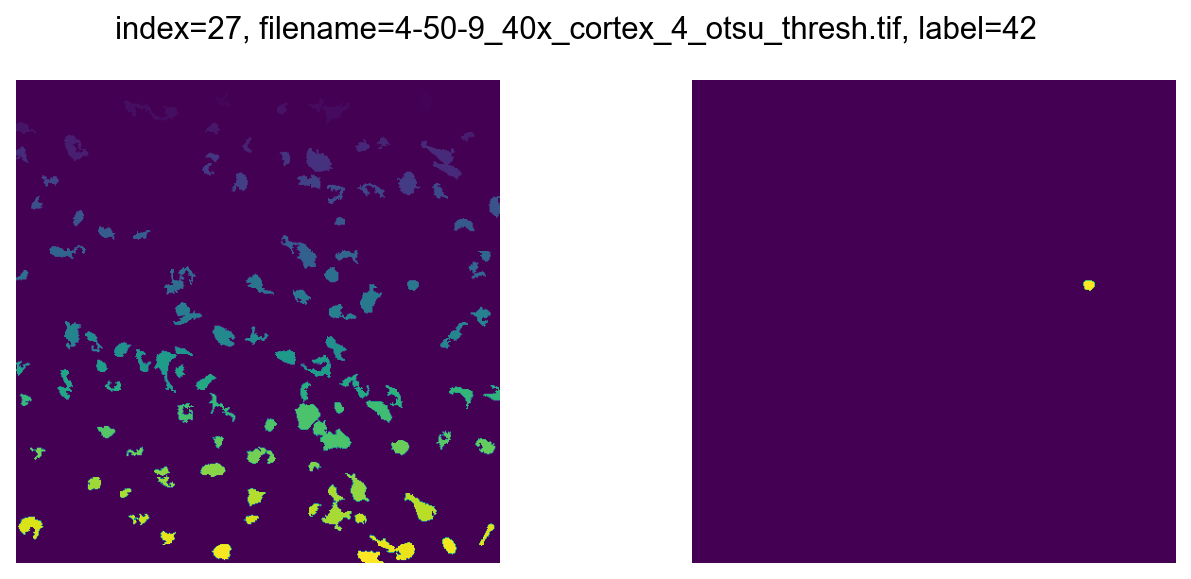

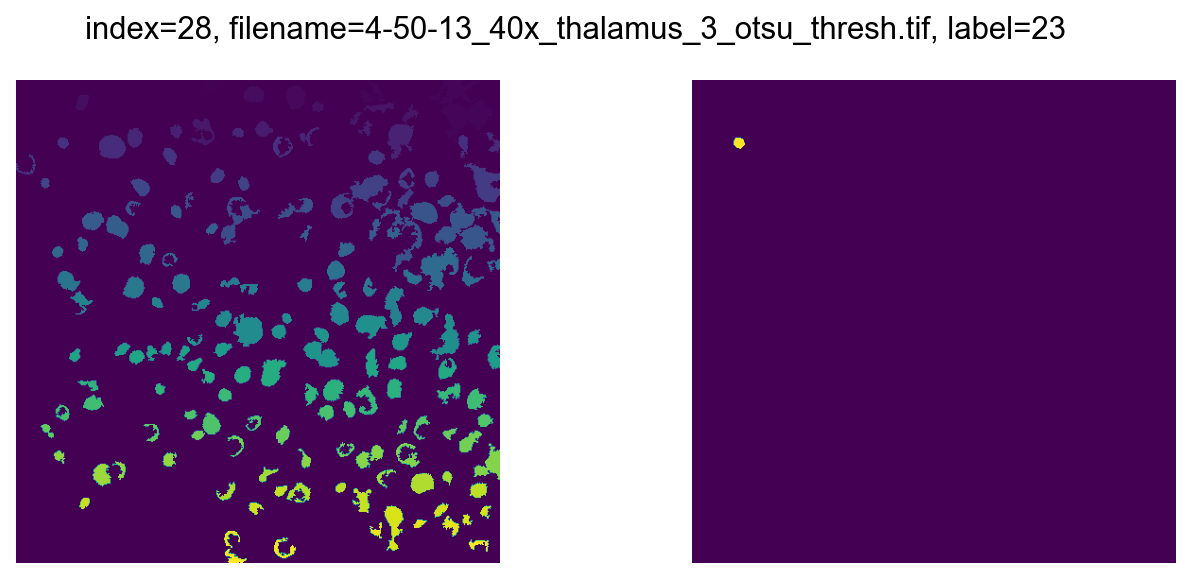

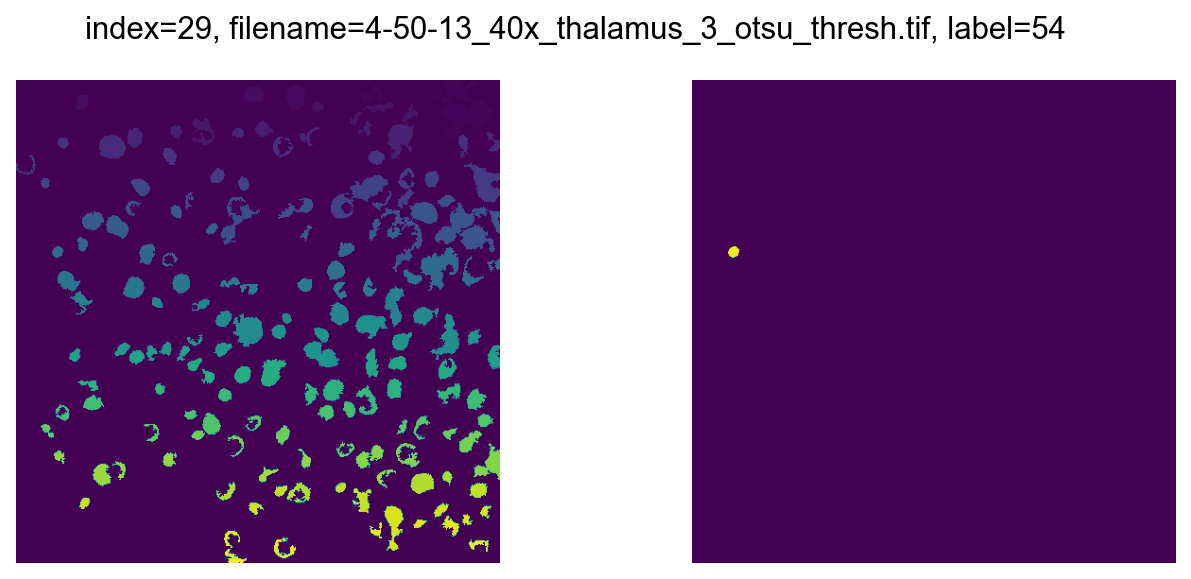

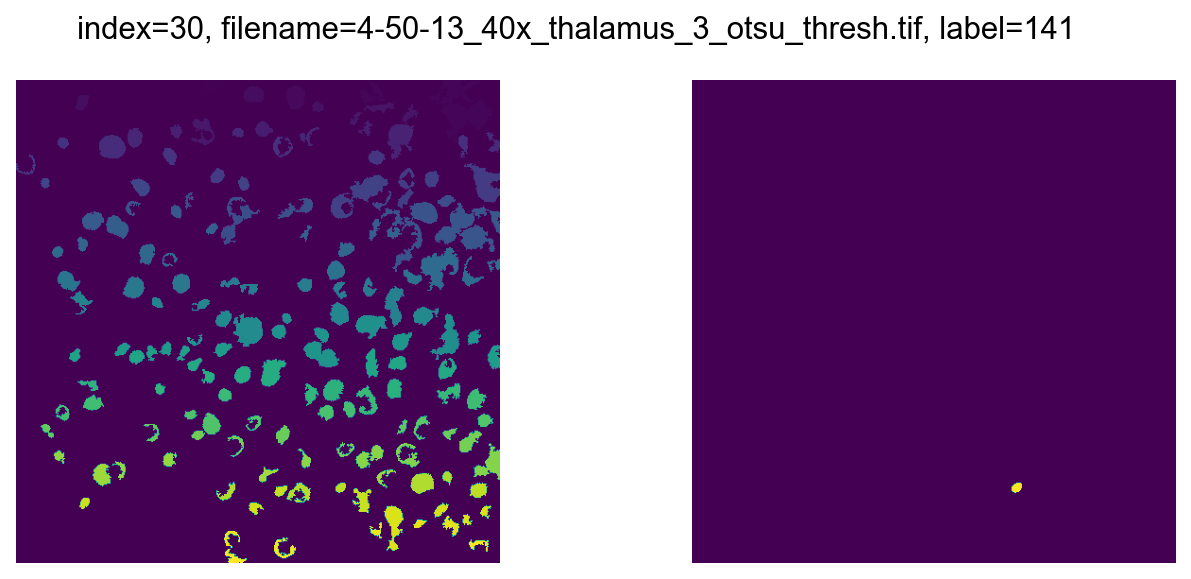

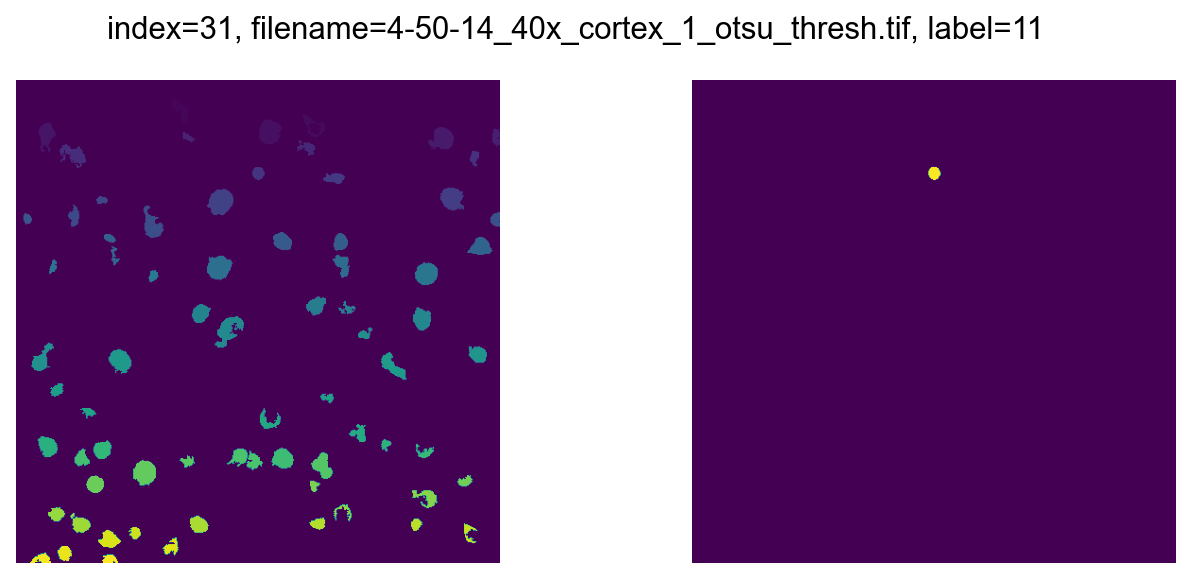

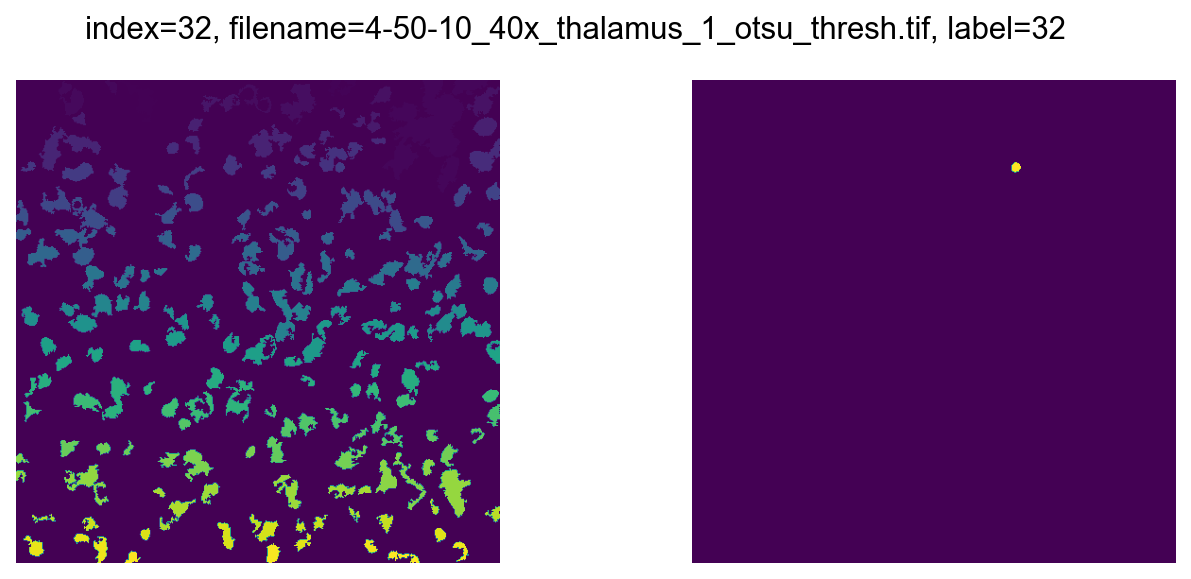

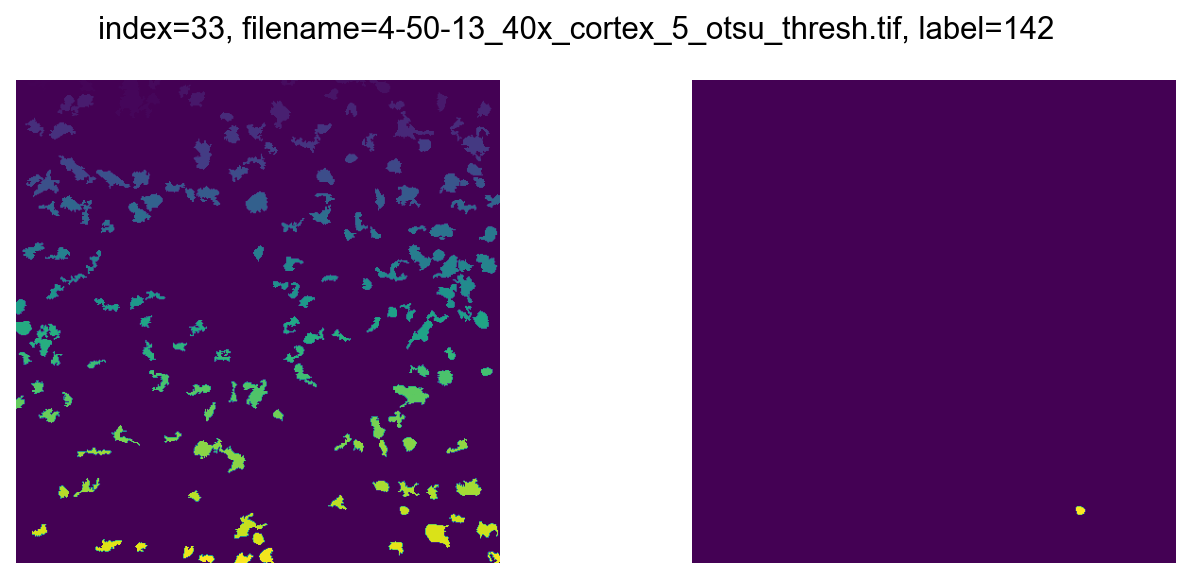

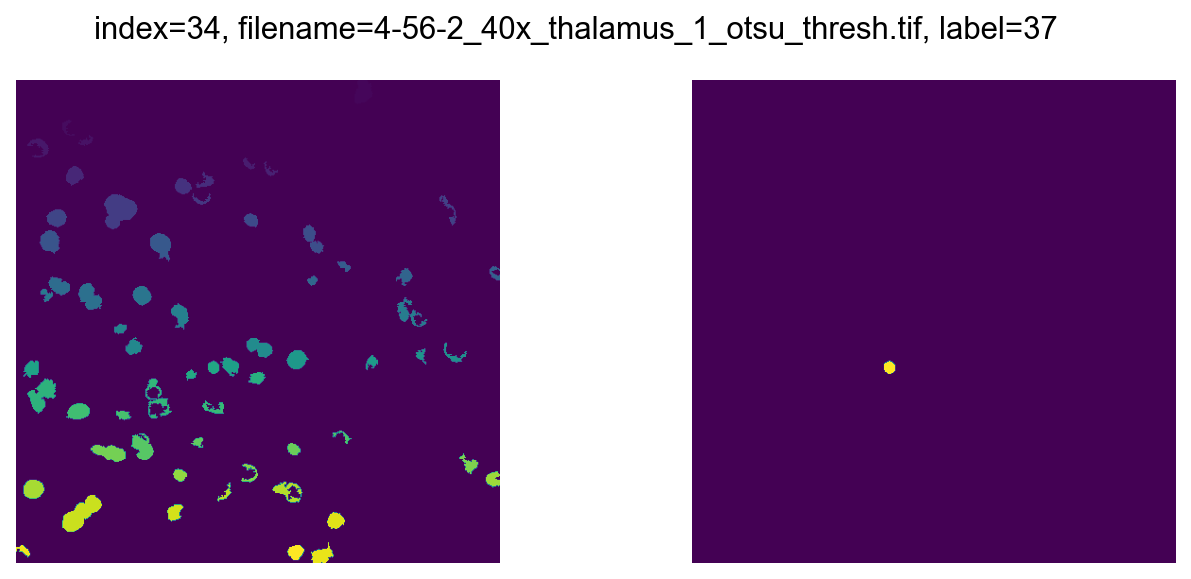

In [13]:
for i in range(over_range_df.shape[0]):
    filename = over_range_df['filename'].iloc[i]
    label = over_range_df['label'].iloc[i]
    img = io.imread(rf'/Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-ogd/2-thresholded-data-tif/{filename}')
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f'index={i}, filename={filename}, label={label}', fontsize=14)
    axs[0].imshow(img)
    axs[0].set_axis_off()    
    axs[1].imshow(img==label)
    axs[1].set_axis_off()

## Appendix: fun visualization of all images in the dataset

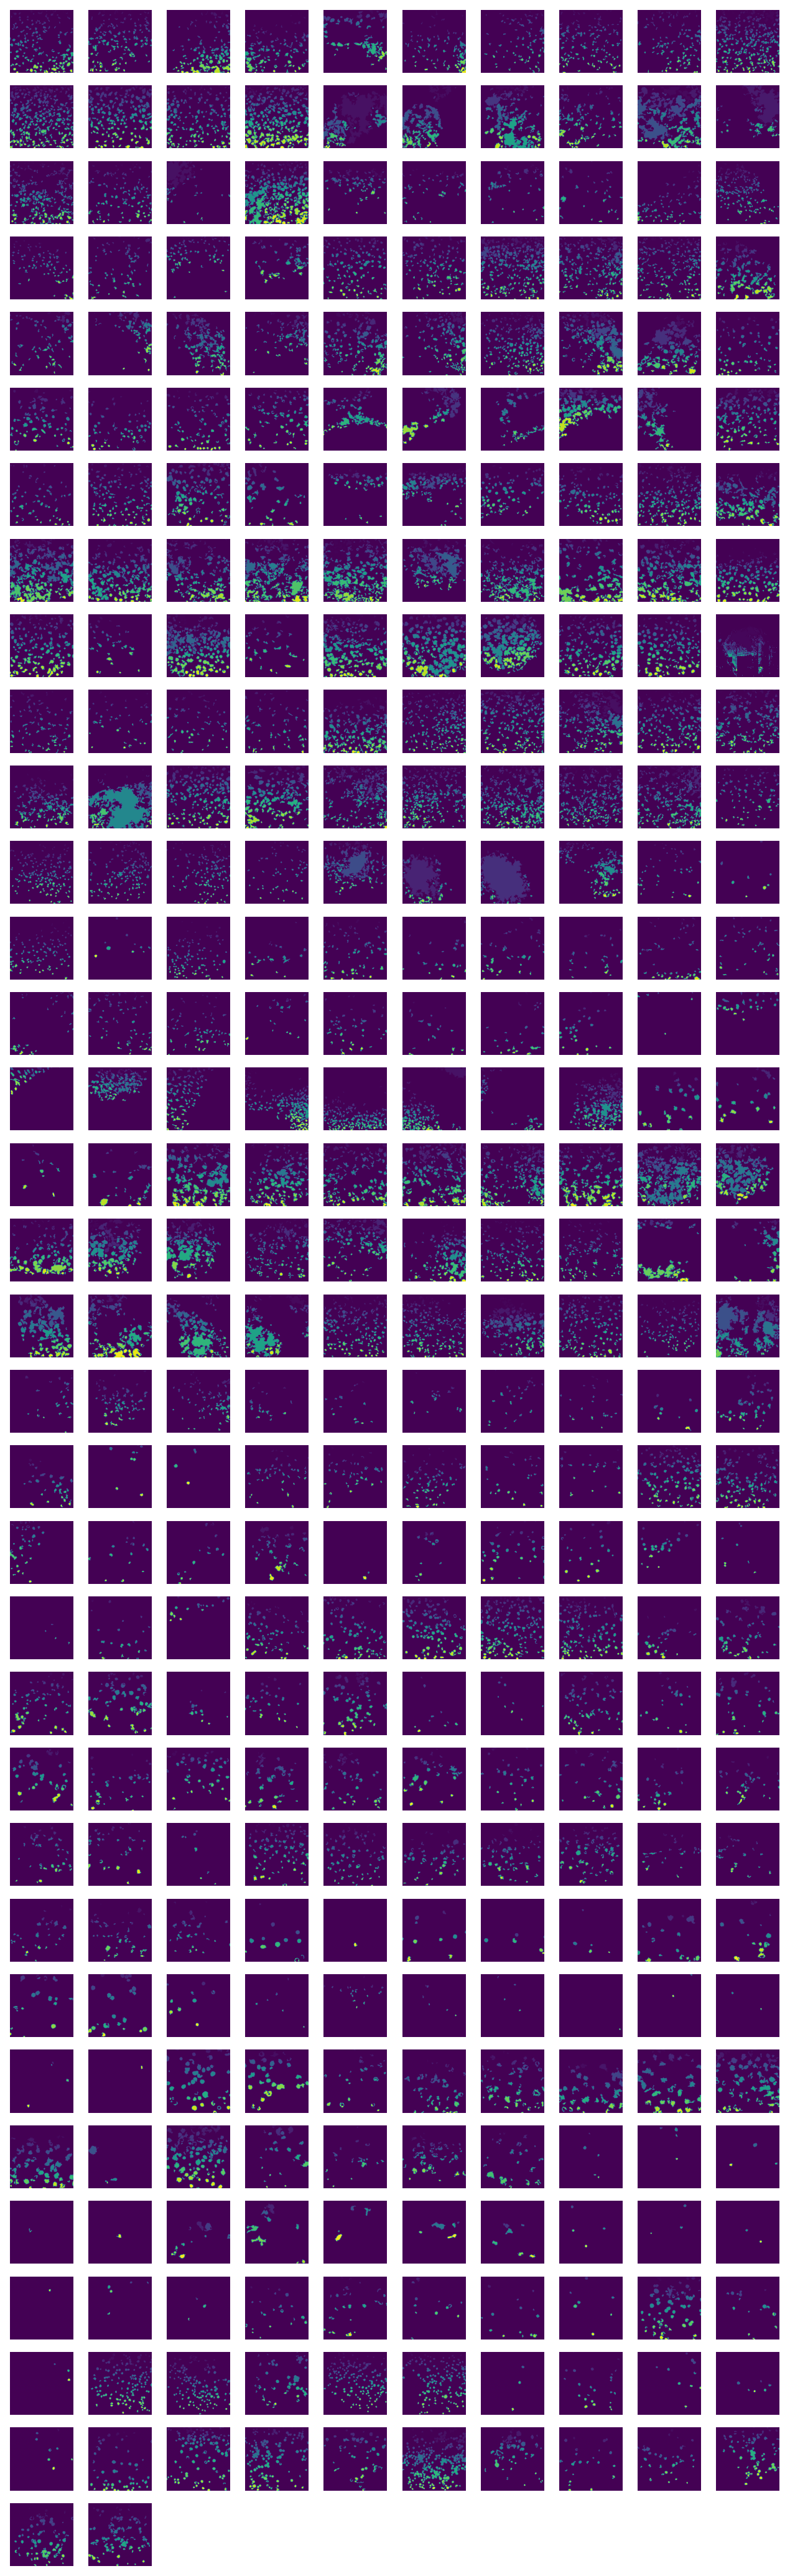

In [14]:
# plot all the images
filenames = np.unique(otsu_properties_df['filename'])
num_filenames = len(filenames)
col = 10
row = int(np.ceil(num_filenames / 10))
scale = 1

fig, axs = plt.subplots(row, col, figsize=(col*scale, row*scale))
for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        axs[row_i, col_i].set_axis_off()
        if i < num_filenames:
            img = io.imread(rf'/Users/tlin/Files/2019-2023 University of Washington/_nance-lab/research-data/microfiber/rat-ogd/2-thresholded-data-tif/{filenames[i]}')
            axs[row_i, col_i].imshow(img)
fig.savefig(rf'{output_path}/all_imgs.png')